In [1]:
using CLOUD
using LinearAlgebra
using Markdown
sequence_path = ["../../results/run_2/advection_DGMulti_p9M2l1_20220616_171005/", "../../results/run_2/advection_DGMulti_p9M2l0_20220616_171007/"]
n = length(sequence_path)
analysis_path = [new_path(string(sequence_path[i],"refinement_analysis/")) 
    for i in 1:n]
(conservation_law, spatial_discretization, 
    initial_data, form, tspan, strategy) = load_project(
        string(sequence_path[1],"grid_1/"));

┌ Info: Installing pyqt package to avoid buggy tkagg backend.
└ @ PyPlot /Users/tristanmontoya/.julia/packages/PyPlot/XaELc/src/init.jl:118


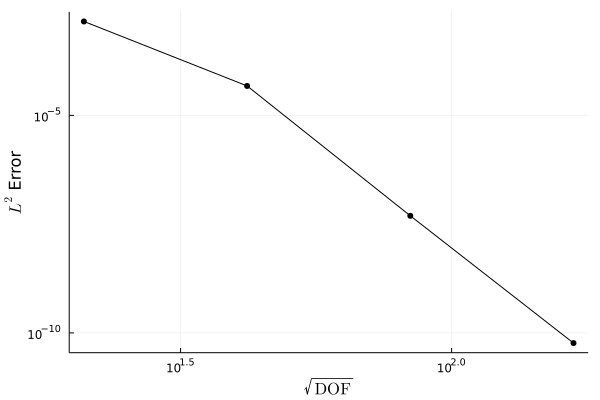

In [2]:
refinement_analysis = [RefinementAnalysis(initial_data, sequence_path[i], analysis_path[i]) for i in 1:n]
refinement_results = [analyze(refinement_analysis[i], 4) for i in 1:n]
plot_analysis(refinement_analysis[1], refinement_results[1])

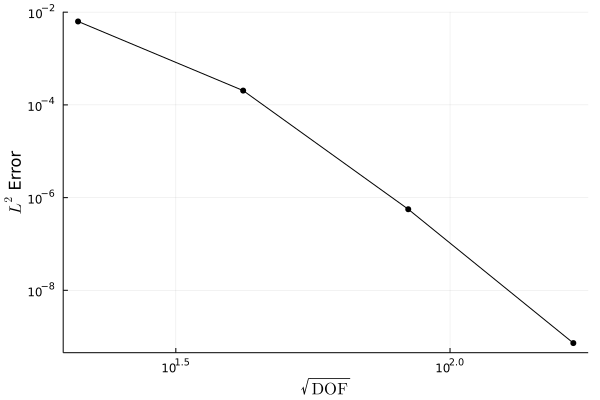

In [3]:
plot_analysis(refinement_analysis[2], refinement_results[2])

In [4]:
tabulate_analysis_for_paper((refinement_results[1],refinement_results[2]))

\begin{table}
  \begin{tabular}{rrrrrrrrr}
    \toprule
    \textbf{$N_e$} & \textbf{Conservation Metric} &  & \textbf{Energy Metric} &  & \textbf{$L^2$ Error} &  & \textbf{Order} &  \\\midrule
    & 8 & -8.125e-15 & -9.458e-15 & -2.996e-05 & 1.058e-05 & 1.441e-03 & 6.297e-03 &  &  \\
    & 32 & -1.781e-14 & -2.036e-14 & -4.994e-08 & 1.925e-08 & 4.746e-05 & 2.032e-04 & 4.92 & 4.95 \\
    & 128 & 6.019e-14 & 5.927e-14 & -3.632e-13 & -4.677e-14 & 4.915e-08 & 5.612e-07 & 9.92 & 8.50 \\
    & 512 & 1.940e-13 & 1.951e-13 & -3.428e-13 & -3.423e-13 & 5.841e-11 & 7.283e-10 & 9.72 & 9.59 \\\bottomrule
  \end{tabular}
\end{table}
